In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = "0" #please put your GPU

In [3]:
data = pd.read_csv("listing_data_clean_final_v2_extra.csv")

print(data.shape)

(57636, 54)


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,rating_class,property_room_type
0,0.80,0.88,0,4.0,1,1,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,65.0,100.0,15.0,1,15.0,1,29,21,6,0,moderate,0,0,1,2,0,0.18,3831.0,3556.0,Central,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,2,Apartment_Private room
1,1.00,0.86,0,1.0,1,1,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100.0,150.0,50.0,2,0.0,10,50,89,4,1,strict_14_with_grace_period,1,1,1,0,0,0.70,3812.0,3796.0,Central,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,2,Apartment_Entire home/apt
2,0.80,0.95,0,18.0,1,1,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,300.0,350.0,90.0,3,10.0,3,365,42,2,1,strict_14_with_grace_period,0,0,15,0,0,0.38,3781.0,3340.0,Central,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,2,Apartment_Entire home/apt
3,1.00,0.93,1,1.0,1,0,51.44687,-0.21874,1,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,65.0,350.0,55.0,2,11.0,21,1125,35,8,0,moderate,0,0,1,0,0,0.69,3694.0,1531.0,South,0.884932,0.658,1,1,1,1,1,1,1,1,1,1,877.248440,15618.994773,16654.097730,45.0,2,Apartment_Entire home/apt
4,0.90,1.00,1,3.0,1,0,51.57224,-0.20906,1,Apartment,Private room,2,1.5,1.0,0.0,Real Bed,29.0,100.0,0.0,1,8.0,10,1120,129,8,1,strict_14_with_grace_period,0,0,0,3,0,1.05,3692.0,3683.0,North,0.087671,0.558,1,1,0,1,1,1,1,1,1,1,628.660352,18016.436195,17493.813963,60.0,2,Apartment_Private room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57631,0.77,0.80,0,3.0,1,1,51.46290,0.02656,0,Apartment,Entire home/apt,5,2.0,2.0,3.0,Real Bed,160.0,0.0,60.0,1,50.0,1,20,4,4,1,strict_14_with_grace_period,0,0,2,0,0,4.00,1910.0,25.0,East,0.761644,0.716,1,1,0,1,0,1,1,0,1,1,4479.281618,2331.621327,3584.569864,22.0,2,Apartment_Entire home/apt
57632,1.00,1.00,0,1.0,1,0,51.48265,-0.42826,1,Apartment,Entire home/apt,5,1.0,1.0,4.0,Real Bed,90.0,150.0,0.0,1,10.0,1,1125,1,1,1,flexible,0,0,6,0,0,1.00,107.0,30.0,West,0.024658,0.635,1,1,1,1,1,1,1,1,0,1,1778.737661,29768.254862,30354.228360,30.0,2,Apartment_Entire home/apt
57633,0.77,0.80,0,3.0,1,1,51.51307,-0.06974,1,Apartment,Entire home/apt,5,2.0,3.0,3.0,Real Bed,300.0,0.0,80.0,1,50.0,1,20,1,1,0,strict_14_with_grace_period,0,0,2,0,0,1.00,1908.0,22.0,East,0.767123,0.853,1,1,1,1,1,1,1,0,1,1,270.014627,6363.858172,5923.972009,22.0,2,Apartment_Entire home/apt
57634,1.00,0.85,0,90.0,1,0,51.51091,-0.08001,1,Apartment,Entire home/apt,6,2.0,2.0,3.0,Real Bed,255.0,800.0,80.0,1,0.0,4,730,1,1,0,strict_14_with_grace_period,0,0,3,0,0,1.00,1749.0,14.0,Central,0.098630,0.000,1,1,1,1,1,1,1,1,1,1,247.618351,6792.949618,6514.184267,14.0,2,Apartment_Entire home/apt


In [6]:
data['rating_class'].value_counts()

2    50118
1     5434
0     2084
Name: rating_class, dtype: int64

In [7]:
data.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_duration_days', 'listing_duration_days', 'region',
       'occupancy_rate', 'crime_rate', 'hangers', 'washer', 'tv', 'detector',
       'kitchen', 'heating', 'essentials', 'iron', 'wi

In [8]:
x_columns = ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'reviews_per_month',
       'host_duration_days', 'listing_duration_days', 'region',
       'occupancy_rate', 'crime_rate', 'hangers', 'washer', 'tv', 'detector',
       'kitchen', 'heating', 'essentials', 'iron', 'wifi', 'dryer',
       'min_dist_subway', 'min_dist_park', 'min_dist_attraction', 'recency', 'property_room_type']


x = data.loc[:, x_columns]
x

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,property_room_type
0,0.80,0.88,0,4.0,1,1,51.56802,-0.11121,1,2,1.0,1.0,0.0,Real Bed,65.0,100.0,15.0,1,15.0,1,29,21,6,0,moderate,0,0,0.18,3831.0,3556.0,Central,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,Apartment_Private room
1,1.00,0.86,0,1.0,1,1,51.48796,-0.16898,1,2,1.0,1.0,1.0,Real Bed,100.0,150.0,50.0,2,0.0,10,50,89,4,1,strict_14_with_grace_period,1,1,0.70,3812.0,3796.0,Central,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,Apartment_Entire home/apt
2,0.80,0.95,0,18.0,1,1,51.52195,-0.14094,0,6,2.0,3.0,3.0,Real Bed,300.0,350.0,90.0,3,10.0,3,365,42,2,1,strict_14_with_grace_period,0,0,0.38,3781.0,3340.0,Central,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,Apartment_Entire home/apt
3,1.00,0.93,1,1.0,1,0,51.44687,-0.21874,1,4,1.0,2.0,2.0,Real Bed,65.0,350.0,55.0,2,11.0,21,1125,35,8,0,moderate,0,0,0.69,3694.0,1531.0,South,0.884932,0.658,1,1,1,1,1,1,1,1,1,1,877.248440,15618.994773,16654.097730,45.0,Apartment_Entire home/apt
4,0.90,1.00,1,3.0,1,0,51.57224,-0.20906,1,2,1.5,1.0,0.0,Real Bed,29.0,100.0,0.0,1,8.0,10,1120,129,8,1,strict_14_with_grace_period,0,0,1.05,3692.0,3683.0,North,0.087671,0.558,1,1,0,1,1,1,1,1,1,1,628.660352,18016.436195,17493.813963,60.0,Apartment_Private room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57631,0.77,0.80,0,3.0,1,1,51.46290,0.02656,0,5,2.0,2.0,3.0,Real Bed,160.0,0.0,60.0,1,50.0,1,20,4,4,1,strict_14_with_grace_period,0,0,4.00,1910.0,25.0,East,0.761644,0.716,1,1,0,1,0,1,1,0,1,1,4479.281618,2331.621327,3584.569864,22.0,Apartment_Entire home/apt
57632,1.00,1.00,0,1.0,1,0,51.48265,-0.42826,1,5,1.0,1.0,4.0,Real Bed,90.0,150.0,0.0,1,10.0,1,1125,1,1,1,flexible,0,0,1.00,107.0,30.0,West,0.024658,0.635,1,1,1,1,1,1,1,1,0,1,1778.737661,29768.254862,30354.228360,30.0,Apartment_Entire home/apt
57633,0.77,0.80,0,3.0,1,1,51.51307,-0.06974,1,5,2.0,3.0,3.0,Real Bed,300.0,0.0,80.0,1,50.0,1,20,1,1,0,strict_14_with_grace_period,0,0,1.00,1908.0,22.0,East,0.767123,0.853,1,1,1,1,1,1,1,0,1,1,270.014627,6363.858172,5923.972009,22.0,Apartment_Entire home/apt
57634,1.00,0.85,0,90.0,1,0,51.51091,-0.08001,1,6,2.0,2.0,3.0,Real Bed,255.0,800.0,80.0,1,0.0,4,730,1,1,0,strict_14_with_grace_period,0,0,1.00,1749.0,14.0,Central,0.098630,0.000,1,1,1,1,1,1,1,1,1,1,247.618351,6792.949618,6514.184267,14.0,Apartment_Entire home/apt


In [9]:
def get_dummy(train_x, variable_columns):
    for colname in variable_columns:
        dummy = pd.get_dummies(train_x[colname], prefix=colname+'==', prefix_sep='')
        train_x = pd.concat([train_x.drop(colname, axis=1), dummy], axis=1)
    
    return train_x

In [10]:
dummy_variable =  ['bed_type','cancellation_policy' , 'region' , 'property_room_type']
x = get_dummy(x,dummy_variable)
x_columns = x.columns

In [11]:
x

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_duration_days,listing_duration_days,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,bed_type==Airbed,bed_type==Couch,bed_type==Futon,bed_type==Pull-out Sofa,bed_type==Real Bed,cancellation_policy==flexible,cancellation_policy==moderate,cancellation_policy==strict,cancellation_policy==strict_14_with_grace_period,cancellation_policy==super_strict_30,cancellation_policy==super_strict_60,region==Central,region==East,region==North,region==South,region==West,property_room_type==Apartment_Entire home/apt,property_room_type==Apartment_Hotel room,property_room_type==Apartment_Private room,property_room_type==Apartment_Shared room,property_room_type==Bungalow_Entire home/apt,property_room_type==Bungalow_Private room,property_room_type==Bungalow_Shared room,property_room_type==Guesthouse_Entire home/apt,property_room_type==Guesthouse_Hotel room,property_room_type==Guesthouse_Private room,property_room_type==Guesthouse_Shared room,property_room_type==Hotel_Entire home/apt,property_room_type==Hotel_Hotel room,property_room_type==Hotel_Private room,property_room_type==Hotel_Shared room,property_room_type==Others_Entire home/apt,property_room_type==Others_Hotel room,property_room_type==Others_Private room,property_room_type==Others_Shared room
0,0.80,0.88,0,4.0,1,1,51.56802,-0.11121,1,2,1.0,1.0,0.0,65.0,100.0,15.0,1,15.0,1,29,21,6,0,0,0,0.18,3831.0,3556.0,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.00,0.86,0,1.0,1,1,51.48796,-0.16898,1,2,1.0,1.0,1.0,100.0,150.0,50.0,2,0.0,10,50,89,4,1,1,1,0.70,3812.0,3796.0,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.80,0.95,0,18.0,1,1,51.52195,-0.14094,0,6,2.0,3.0,3.0,300.0,350.0,90.0,3,10.0,3,365,42,2,1,0,0,0.38,3781.0,3340.0,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.00,0.93,1,1.0,1,0,51.44687,-0.21874,1,4,1.0,2.0,2.0,65.0,350.0,55.0,2,11.0,21,1125,35,8,0,0,0,0.69,3694.0,1531.0,0.884932,0.658,1,1,1,1,1,1,1,1,1,1,877.248440,15618.994773,16654.097730,45.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.90,1.00,1,3.0,1,0,51.57224,-0.20906,1,2,1.5,1.0,0.0,29.0,100.0,0.0,1,8.0,10,1120,129,8,1,0,0,1.05,3692.0,3683.0,0.087671,0.558,1,1,0,1,1,1,1,1,1,1,628.660352,18016.436195,17493.813963,60.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57631,0.77,0.80,0,3.0,1,1,51.46290,0.02656,0,5,2.0,2.0,3.0,160.0,0.0,60.0,1,50.0,1,20,4,4,1,0,0,4.00,1910.0,25.0,0.761644,0.716,1,1,0,1,0,1,1,0,1,1,4479.281618,2331.621327,3584.569864,22.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57632,1.00,1.00,0,1.0,1,0,51.48265,-0.42826,1,5,1.0,1.0,4.0,90.0,150.0,0.0,1,10.0,1,1125,1,1,1,0,0,1.00,107.0,30.0,0.024658,0.635,1,1,1,1,1,1,1,1,0,1,1778.737661,29768.254862,30354.228360,30.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57633,0.77,0.80,0,3.0,1,1,51.51307,-0.06974,1,5

In [12]:
x = x.drop([  'reviews_per_month','number_of_reviews', 'latitude', 'longitude','host_total_listings_count','property_room_type==Others_Entire home/apt', 'property_room_type==Others_Hotel room', 
            'property_room_type==Others_Private room', 'property_room_type==Others_Shared room'], 
           axis=1)

In [13]:
x_columns = x.columns

In [14]:
x = x.values

In [15]:
y = data['rating_class'] 
y = y.values
y

array([2, 2, 2, ..., 2, 2, 0])

In [16]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=2019)

In [17]:
x_train.shape

(46108, 70)

In [18]:
# Build the tf.keras model by stacking layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512,input_dim=70, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [19]:
# Look at the model structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               36352     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               51300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 87,955
Trainable params: 87,955
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
x_test

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.9 , 0.89, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [1.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.7 , 0.99, 0.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [22]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1441/1441 [==============================] - 5s 3ms/step - loss: 12.4422 - accuracy: 0.8550 - val_loss: 3499.4709 - val_accuracy: 0.8682
Epoch 2/10
1441/1441 [==============================] - 5s 3ms/step - loss: 16.5338 - accuracy: 0.8695 - val_loss: 0.8154 - val_accuracy: 0.8684
Epoch 3/10
1441/1441 [==============================] - 5s 3ms/step - loss: 0.4679 - accuracy: 0.8698 - val_loss: 0.6617 - val_accuracy: 0.8684
Epoch 4/10
1441/1441 [==============================] - 5s 3ms/step - loss: 0.4806 - accuracy: 0.8698 - val_loss: 0.4855 - val_accuracy: 0.8683
Epoch 5/10
1441/1441 [==============================] - 5s 3ms/step - loss: 0.4648 - accuracy: 0.8698 - val_loss: 0.4826 - val_accuracy: 0.8683
Epoch 6/10
1441/1441 [==============================] - 5s 3ms/step - loss: 54.7032 - accuracy: 0.8697 - val_loss: 0.8525 - val_accuracy: 0.8684
Epoch 7/10
1441/1441 [==============================] - 5s 3ms/step - loss: 0.4758 - accuracy: 0.8698 - val_loss: 0.6340 - val_acc

In [23]:
model.save('air_bnb_v1.h5')

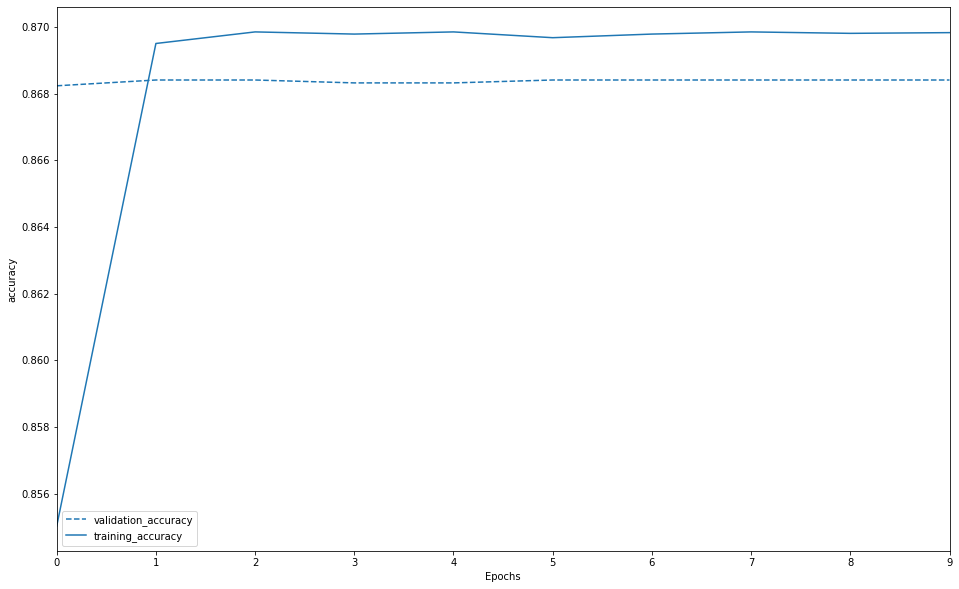

In [24]:
def plot_history(key):
    plt.figure(figsize=(16,10))
    val = plt.plot(history.epoch, history.history['val_'+key], '--', label='validation_' + key)
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),label= 'training_' + key)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.xlim([0,max(history.epoch)])
plot_history('accuracy')

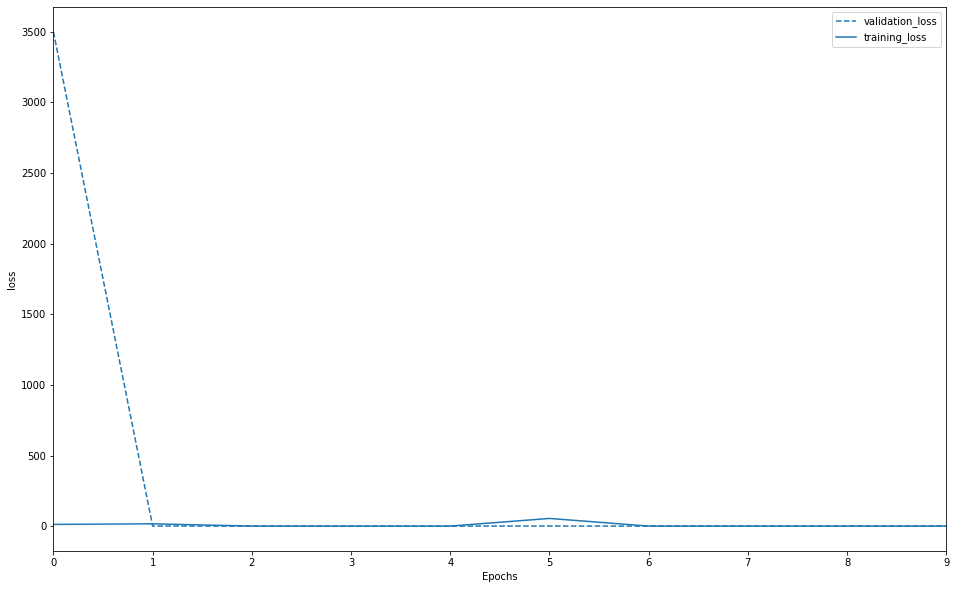

In [25]:
plot_history('loss')

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)

361/361 [==============================] - 1s 2ms/step - loss: 0.6278 - accuracy: 0.8684


In [27]:
y_test.shape

(11528,)

In [28]:
print("Loss", test_loss, "\nAccuracy", test_acc)

Loss 0.6278066635131836 
Accuracy 0.8684073686599731


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [30]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import layers

print(tf.__version__)
print(tf.keras.__version__)

2.2.0
2.3.0-tf


In [31]:
'''
Create a NN with 1 input layer
2 Dense hidden layer with 64 nodes each, activation function reLU for each node
1 output layer with 10 outputs (interpreted as probabilites over 10 classes)
'''
'''Read more about Sequential API here: https://keras.io/models/sequential/'''
model = tf.keras.Sequential()
#model.add(layers.Flatten(input_shape=88))         # input layer
model.add(layers.Dense(64, input_dim=70, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(64, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(3, activation=tf.nn.softmax))   # one output layer with 3 outputs

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                4544      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 8,899
Trainable params: 8,899
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model with appropriate Loss function. metrics is something you can monitor (but model does not optimize metrc)

# Below code works on tf 1.19
# model.compile(optimizer=tf.train.AdamOptimizer(), 
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# Below code works on tf 2.0
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Adam Optimizer - adaptive method for learning
# Adamgrad, adammax, rmsprox are good loss functions

In [33]:
# Run the stochastic gradient descent for specified epochs
# if loss is less tha 0.01 - can stop
epochs = 5
model.fit(x_train, y_train, epochs=epochs) # by default batch size is 32, can be changed. Documentation in the API - keras.io/models/model/#fit

Epoch 1/5
1441/1441 [==============================] - 4s 3ms/step - loss: 14.0867 - accuracy: 0.7749
Epoch 2/5
1441/1441 [==============================] - 4s 3ms/step - loss: 857.5882 - accuracy: 0.7780
Epoch 3/5
1441/1441 [==============================] - 4s 2ms/step - loss: 4.8444 - accuracy: 0.7781
Epoch 4/5
1441/1441 [==============================] - 4s 3ms/step - loss: 3.6780 - accuracy: 0.7802
Epoch 5/5
1441/1441 [==============================] - 4s 3ms/step - loss: 2.8363 - accuracy: 0.7827


In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

361/361 [==============================] - 1s 2ms/step - loss: 2.9526 - accuracy: 0.8645
Test accuracy: 0.864503800868988


In [35]:
'''
Create a NN with 1 input layer
2 Dense hidden layer with 64 nodes each, activation function reLU for each node
1 output layer with 10 outputs (interpreted as probabilites over 10 classes)
'''
'''Read more about Sequential API here: https://keras.io/models/sequential/'''
model = tf.keras.Sequential()
#model.add(layers.Flatten(input_shape=88))         # input layer
model.add(layers.Dense(64, input_dim=70, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(64, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(32, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(32, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(32, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(32, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(3, activation=tf.nn.softmax))   # one output layer with 3 outputs

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                4544      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 3)                

In [36]:
# Compile the model with appropriate Loss function. metrics is something you can monitor (but model does not optimize metrc)

# Below code works on tf 1.19
# model.compile(optimizer=tf.train.AdamOptimizer(), 
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# Below code works on tf 2.0
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Adam Optimizer - adaptive method for learning
# Adamgrad, adammax, rmsprox are good loss functions

# Run the stochastic gradient descent for specified epochs
# if loss is less tha 0.01 - can stop
epochs = 20
history = model.fit(x_train, y_train, epochs=epochs) # by default batch size is 32, can be changed. Documentation in the API - keras.io/models/model/#fit

Epoch 1/20
1441/1441 [==============================] - 5s 3ms/step - loss: 2.3336 - accuracy: 0.8294
Epoch 2/20
1441/1441 [==============================] - 5s 3ms/step - loss: 65.0004 - accuracy: 0.8685
Epoch 3/20
1441/1441 [==============================] - 5s 3ms/step - loss: 0.5121 - accuracy: 0.8698
Epoch 4/20
1441/1441 [==============================] - 5s 3ms/step - loss: 0.4751 - accuracy: 0.8699
Epoch 5/20
1441/1441 [==============================] - 5s 3ms/step - loss: 0.4648 - accuracy: 0.8699
Epoch 6/20
1441/1441 [==============================] - 5s 3ms/step - loss: 0.4712 - accuracy: 0.8698
Epoch 7/20
1441/1441 [==============================] - 5s 3ms/step - loss: 0.4641 - accuracy: 0.8698
Epoch 8/20
1441/1441 [==============================] - 5s 3ms/step - loss: 0.4638 - accuracy: 0.8699
Epoch 9/20
1441/1441 [==============================] - 5s 3ms/step - loss: 0.4639 - accuracy: 0.8698
Epoch 10/20
1441/1441 [==============================] - 5s 3ms/step - loss: 0.46

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

361/361 [==============================] - 1s 2ms/step - loss: 0.5442 - accuracy: 0.8684
Test accuracy: 0.8684073686599731


In [38]:
'''
Create a NN with 1 input layer
2 Dense hidden layer with 64 nodes each, activation function reLU for each node
1 output layer with 10 outputs (interpreted as probabilites over 10 classes)
'''
'''Read more about Sequential API here: https://keras.io/models/sequential/'''
model = tf.keras.Sequential()
#model.add(layers.Flatten(input_shape=88))         # input layer
model.add(layers.Dense(64, input_dim=70, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(64, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(32, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(32, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(32, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(32, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(3, activation=tf.nn.softmax))   # one output layer with 3 outputs

model.summary()


model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                4544      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 3)                

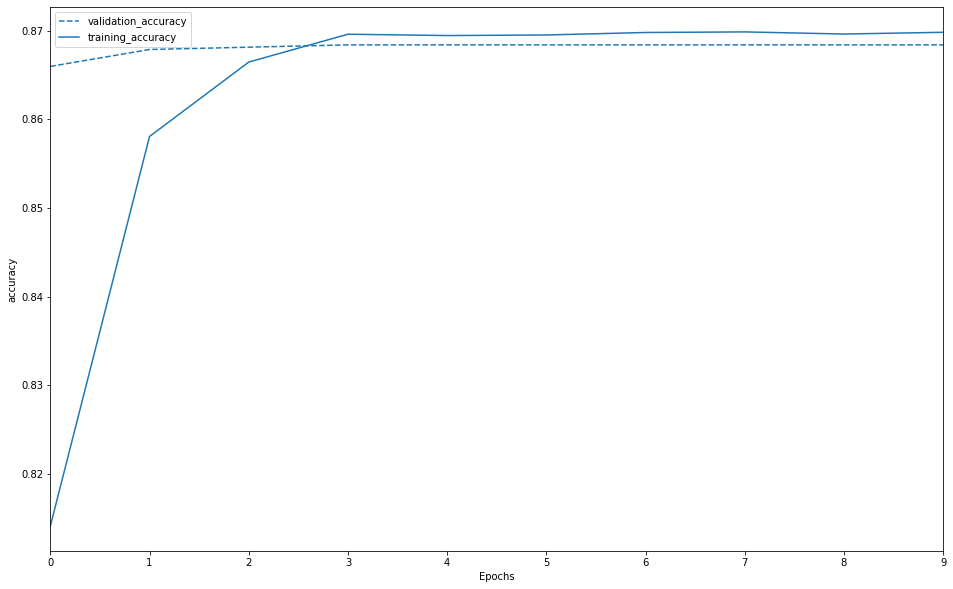

In [39]:
def plot_history(key):
    plt.figure(figsize=(16,10))
    val = plt.plot(history.epoch, history.history['val_'+key], '--', label='validation_' + key)
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),label= 'training_' + key)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.xlim([0,max(history.epoch)])
plot_history('accuracy')

In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

361/361 [==============================] - 1s 2ms/step - loss: 0.4679 - accuracy: 0.8684
Test accuracy: 0.8684073686599731


In [41]:
'''
Create a NN with 1 input layer
2 Dense hidden layer with 64 nodes each, activation function reLU for each node
1 output layer with 10 outputs (interpreted as probabilites over 10 classes)
'''
'''Read more about Sequential API here: https://keras.io/models/sequential/'''
model = tf.keras.Sequential()
#model.add(layers.Flatten(input_shape=88))         # input layer
model.add(layers.Dense(64, input_dim=70, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(64, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dropout(.2, input_shape=(2,)))
model.add(layers.Dense(32, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dropout(.2, input_shape=(2,)))
model.add(layers.Dense(32, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dropout(.2, input_shape=(2,)))
model.add(layers.Dense(32, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(32, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(3, activation=tf.nn.softmax))   # one output layer with 3 outputs

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                4544      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)               

In [42]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1441/1441 [==============================] - 6s 4ms/step - loss: 15.5130 - accuracy: 0.8269 - val_loss: 0.5356 - val_accuracy: 0.8684
Epoch 2/10
1441/1441 [==============================] - 6s 4ms/step - loss: 0.4862 - accuracy: 0.8693 - val_loss: 0.4876 - val_accuracy: 0.8684
Epoch 3/10
1441/1441 [==============================] - 6s 4ms/step - loss: 0.4727 - accuracy: 0.8697 - val_loss: 0.4826 - val_accuracy: 0.8684
Epoch 4/10
1441/1441 [==============================] - 6s 4ms/step - loss: 0.4655 - accuracy: 0.8697 - val_loss: 59.6023 - val_accuracy: 0.8682
Epoch 5/10
1441/1441 [==============================] - 6s 4ms/step - loss: 0.4705 - accuracy: 0.8698 - val_loss: 25.3303 - val_accuracy: 0.8682
Epoch 6/10
1441/1441 [==============================] - 6s 4ms/step - loss: 33.2969 - accuracy: 0.8697 - val_loss: 35.4901 - val_accuracy: 0.8682
Epoch 7/10
1441/1441 [==============================] - 6s 4ms/step - loss: 88.1466 - accuracy: 0.8698 - val_loss: 439.0000 - val_a

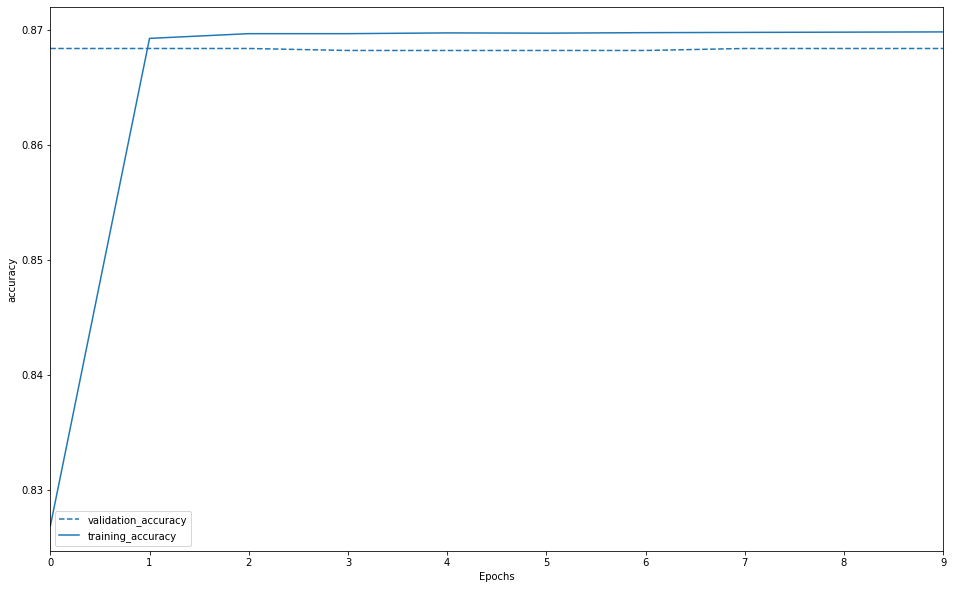

In [43]:
def plot_history(key):
    plt.figure(figsize=(16,10))
    val = plt.plot(history.epoch, history.history['val_'+key], '--', label='validation_' + key)
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),label= 'training_' + key)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.xlim([0,max(history.epoch)])
plot_history('accuracy')

In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

361/361 [==============================] - 1s 2ms/step - loss: 0.5184 - accuracy: 0.8684
Test accuracy: 0.8684073686599731


In [45]:
test_loss

0.5183916687965393

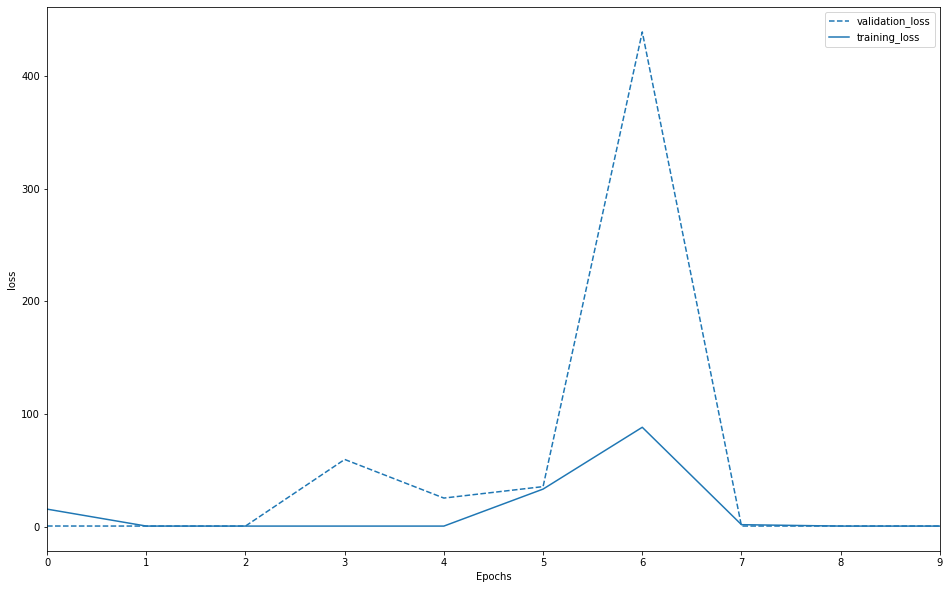

In [46]:
plot_history('loss')

Instructions for updating:
Please use `model.predict()` instead.


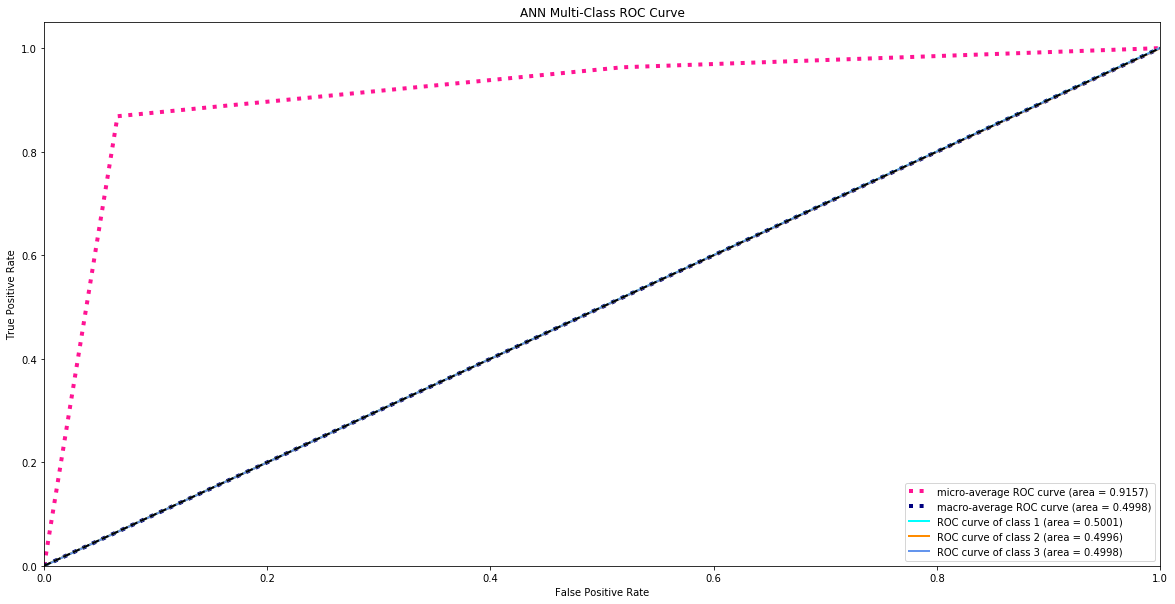

In [47]:


y_score_ = model.predict_proba(x_test)

# Binarize the output
y_ = label_binarize(y, classes=[0, 1, 2])
y_test_= label_binarize(y_test, classes=[0, 1, 2])
y_train_ = label_binarize(y_train, classes=[0, 1, 2])

n_classes = y_.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], y_score_[:, i])
    
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_.ravel(), y_score_.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [48]:
y_score_.shape

(11528, 3)

In [49]:
roc_auc["micro"]

0.9156621169571261

In [50]:
y_pred = model.predict(x_test)
y_pred

array([[0.03273385, 0.08606586, 0.88120025],
       [0.03273385, 0.08606586, 0.88120025],
       [0.03273385, 0.08606586, 0.88120025],
       ...,
       [0.03273385, 0.08606586, 0.88120025],
       [0.03273385, 0.08606586, 0.88120025],
       [0.03273385, 0.08606586, 0.88120025]], dtype=float32)

In [51]:
score = model.evaluate(x_test, y_test,verbose=1)

361/361 [==============================] - 1s 2ms/step - loss: 0.5184 - accuracy: 0.8684


In [52]:
weights = model.get_weights()

In [53]:
for i in range(len(weights)):
    print(weights[i].shape)

(70, 64)
(64,)
(64, 64)
(64,)
(64, 32)
(32,)
(32, 32)
(32,)
(32, 32)
(32,)
(32, 32)
(32,)
(32, 3)
(3,)
